In [33]:
import pandas as pd
import requests 
import json
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os
import math

In [25]:
url = "https://ies-python-midterm.s3.eu-central-1.amazonaws.com/studentsSets/90940780.zip"
filename = "90940780.zip"

r = requests.get(url)
with open(filename, 'wb') as f:
    f.write(r.content)
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall("C:/Users/ourri/OneDrive/Dokumenty/Škola/Python/Python_repo")

In [26]:
def read_csv(filename):
    df = pd.read_csv(filename)
    df['Company'] = os.path.basename(filename)
    return df

# List of csv filenames
firms = ['C:/Users/ourri/OneDrive/Dokumenty/Škola/Python/Python_repo/data/FDS.csv',
         'C:/Users/ourri/OneDrive/Dokumenty/Škola/Python/Python_repo/data/KEYS.csv',
         'C:/Users/ourri/OneDrive/Dokumenty/Škola/Python/Python_repo/data/WM.csv',
         'C:/Users/ourri/OneDrive/Dokumenty/Škola/Python/Python_repo/data/WY.csv']

# List of dataframes
dfs = []

# Loop through firms and read data into dataframes
for firm in firms:
    df = read_csv(firm)
    dfs.append(df)

# Concatenate dataframes into a single dataframe
combined_df = pd.concat(dfs)

# Print the combined dataframe
print(combined_df)

            Date        High         Low        Open       Close     Volume  \
0     2017-11-13  196.210007  194.460007  195.399994  195.889999   283000.0   
1     2017-11-14  196.449997  194.119995  194.940002  195.220001   187200.0   
2     2017-11-15  196.429993  192.509995  194.449997  195.419998   206600.0   
3     2017-11-16  196.699997  195.000000  195.919998  195.289993   180300.0   
4     2017-11-17  196.270004  195.080002  195.080002  196.089996   317100.0   
...          ...         ...         ...         ...         ...        ...   
1254  2022-11-07   31.040001   30.299999   30.490000   30.959999  2572300.0   
1255  2022-11-08   31.180000   30.700001   30.990000   31.020000  2908300.0   
1256  2022-11-09   31.080000   29.969999   30.870001   30.059999  2877200.0   
1257  2022-11-10   32.990002   31.250000   31.330000   32.860001  4965700.0   
1258  2022-11-11   33.400002   32.849998   32.939999   33.090000  2868800.0   

       Adj Close  Company  
0     187.135559  FDS.c

In [27]:
# Filter the dataframe to include only rows where columns have the same value
diff_df = combined_df[combined_df['Close'] == combined_df['Adj Close']]

# Get a list of the unique companies in the filtered dataframe
diff_companies = diff_df['Company'].unique()

# Print the list of companies with no difference between columns
if len(diff_companies) > 0:
    print("The following companies have no difference between columns:")
    for company in diff_companies:
        print(company)
else:
    print("No companies have no difference between columns.")

The following companies have no difference between columns:
FDS.csv
KEYS.csv
WM.csv
WY.csv


In [31]:
max_prices = combined_df.groupby('Company')['Adj Close'].max()
min_prices = combined_df.groupby('Company')['Adj Close'].min()

# Print the results
print("Max prices:")
print(max_prices)
print("Min prices:")
print(min_prices)

Max prices:
Company
FDS.csv     487.829559
KEYS.csv    207.929993
WM.csv      175.289993
WY.csv       42.220001
Name: Adj Close, dtype: float64
Min prices:
Company
FDS.csv     178.721649
KEYS.csv     41.540001
WM.csv       73.424927
WY.csv       12.451620
Name: Adj Close, dtype: float64


In [34]:
combined_df['Log_Returns'] = combined_df['Adj Close'].pct_change().apply(lambda x: math.log(1+x))

# Group the dataframe by "Company" and calculate the min, max, mean, and median of the logarithmic returns for each group
return_stats = combined_df.groupby('Company')['Log_Returns'].agg(['min', 'max', 'mean', 'median'])

# Print the results
print("Logarithmic return statistics:")
print(return_stats)

Logarithmic return statistics:
               min       max      mean    median
Company                                         
FDS.csv  -0.117682  0.140840  0.000645  0.001863
KEYS.csv -2.251767  0.118456 -0.000711  0.001555
WM.csv   -0.819975  0.086636 -0.000068  0.001000
WY.csv   -1.673449  0.225665 -0.001243  0.001261


In [41]:
max_prices = combined_df.loc[combined_df.groupby('Company')['Log_Returns'].idxmax()]
min_prices = combined_df.loc[combined_df.groupby('Company')['Log_Returns'].idxmin()]

# Print the results
print("Dates of highest gain:")
print(max_prices[['Company', 'Date']])
print("Dates of highest loss:")
print(min_prices[['Company', 'Date']])

Dates of highest gain:
      Company        Date
657   FDS.csv  2020-06-25
657  KEYS.csv  2020-06-25
657    WM.csv  2020-06-25
657    WY.csv  2020-06-25
445   FDS.csv  2019-08-22
445  KEYS.csv  2019-08-22
445    WM.csv  2019-08-22
445    WY.csv  2019-08-22
587   FDS.csv  2020-03-17
587  KEYS.csv  2020-03-17
587    WM.csv  2020-03-17
587    WY.csv  2020-03-17
592   FDS.csv  2020-03-24
592  KEYS.csv  2020-03-24
592    WM.csv  2020-03-24
592    WY.csv  2020-03-24
Dates of highest loss:
      Company        Date
588   FDS.csv  2020-03-18
588  KEYS.csv  2020-03-18
588    WM.csv  2020-03-18
588    WY.csv  2020-03-18
0     FDS.csv  2017-11-13
0    KEYS.csv  2017-11-13
0      WM.csv  2017-11-13
0      WY.csv  2017-11-13
0     FDS.csv  2017-11-13
0    KEYS.csv  2017-11-13
0      WM.csv  2017-11-13
0      WY.csv  2017-11-13
0     FDS.csv  2017-11-13
0    KEYS.csv  2017-11-13
0      WM.csv  2017-11-13
0      WY.csv  2017-11-13


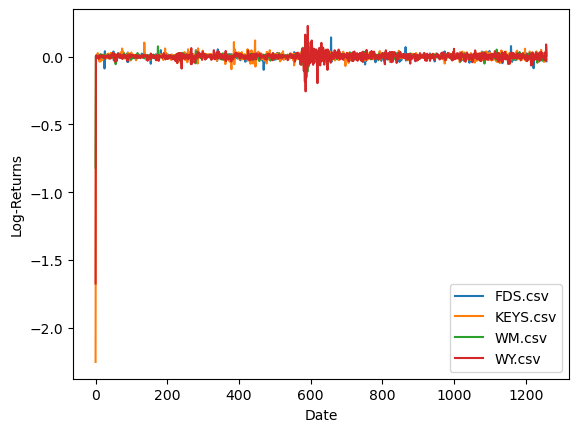

In [44]:
df_pivoted = combined_df.pivot(columns='Company', values='Log_Returns')

# Plot the log-returns for each company
plt.plot(df_pivoted)
plt.legend(df_pivoted.columns)
plt.xlabel('Date')
plt.ylabel('Log-Returns')
plt.show()